# Rossmann Store Sales



# Bibliotheken importieren



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

## Daten importieren

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype

# pd.set_option('display.max_columns', None)

dtypes_train = {
    'Store' : 'int',
    'DayOfWeek' : 'category',
    'Sales' : 'int',
    'Customers' : 'int',
    'Open' : 'bool',
    'Promo' : 'bool',
    'StateHoliday' : 'category',
    'SchoolHoliday' : 'bool'
}
train = pd.read_csv('train.csv', parse_dates = ['Date'], dtype = dtypes_train)
# display(train.info())
# display(train.head())

dtypes_store = {
    'Store' : 'int',
    'StoreType' : 'category',
    'Assortment' : 'category',
    'CompetitionDistance' : 'object',
    'CompetitionOpenSinceMonth' : 'object',
    'CompetitionOpenSinceYear' : 'object',
    'Promo2' : 'bool',
    'Promo2SinceWeek' : 'object',
    'Promo2SinceYear' : 'object',
    'PromoInterval' : 'object'
}

store = pd.read_csv('store.csv', dtype = dtypes_store)
# display(store.info())
# display(store.head())

demand = train.merge(store, how = 'inner', on = 'Store')
demand.set_index(['Date'], inplace = True)
demand.sort_index(axis = 0, ascending = True, inplace = True)
display(demand.info())
display(demand.head())

# daily_demand = demand[['Sales', 'Customers']].resample('D').sum()
# monthly_demand = demand[['Sales', 'Customers']].resample('M').sum()
# weekly_demand = demand[['Sales', 'Customers']].resample('W').sum()

# display(daily_demand.info())
# display(daily_demand.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,False,False,a,True,d,c,5350,NaN,NaN,True,22,2012,"Mar,Jun,Sept,Dec"
2013-01-01,746,2,0,0,False,False,a,True,d,c,4330,2,2011,True,35,2011,"Mar,Jun,Sept,Dec"
2013-01-01,171,2,0,0,False,False,a,True,a,a,2640,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,694,2,0,0,False,False,a,True,a,c,460,11,2012,True,40,2014,"Jan,Apr,Jul,Oct"
2013-01-01,396,2,0,0,False,False,a,True,a,c,23130,NaN,NaN,False,NaN,NaN,NaN


# Daten vorbereiten

In [3]:
demand['StateHoliday'] = demand['StateHoliday'].replace(to_replace = ['0','a','b','c'], value = ['None', 'Public holiday', 'Easter', 'Christmas']).astype('category')
demand['Assortment'] = demand['Assortment'].replace(to_replace = ['a','b','c'], value = ['basic', 'extra', 'extended']).astype('category')

display(demand.info())

display(demand[demand['CompetitionDistance'].isnull()])

# ToDo: 
# - encoding Competition
# - encoding Promo2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,622,2,0,0,False,False,Public holiday,True,a,extended,NaN,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,291,2,0,0,False,False,Public holiday,True,d,basic,NaN,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,879,2,0,0,False,False,Public holiday,True,d,basic,NaN,NaN,NaN,True,5,2013,"Feb,May,Aug,Nov"
2013-01-02,291,3,7658,876,True,False,None,True,d,basic,NaN,NaN,NaN,False,NaN,NaN,NaN
2013-01-02,879,3,3077,326,True,False,None,True,d,basic,NaN,NaN,NaN,True,5,2013,"Feb,May,Aug,Nov"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-30,622,4,5412,406,True,True,None,True,a,extended,NaN,NaN,NaN,False,NaN,NaN,NaN
2015-07-30,879,4,5861,426,True,True,None,False,d,basic,NaN,NaN,NaN,True,5,2013,"Feb,May,Aug,Nov"
2015-07-31,291,5,10052,973,True,True,None,True,d,basic,NaN,NaN,NaN,False,NaN,NaN,NaN


## Visualisieren & Analysieren

### Zeitdiagramm

<AxesSubplot:xlabel='Date', ylabel='Sales'>

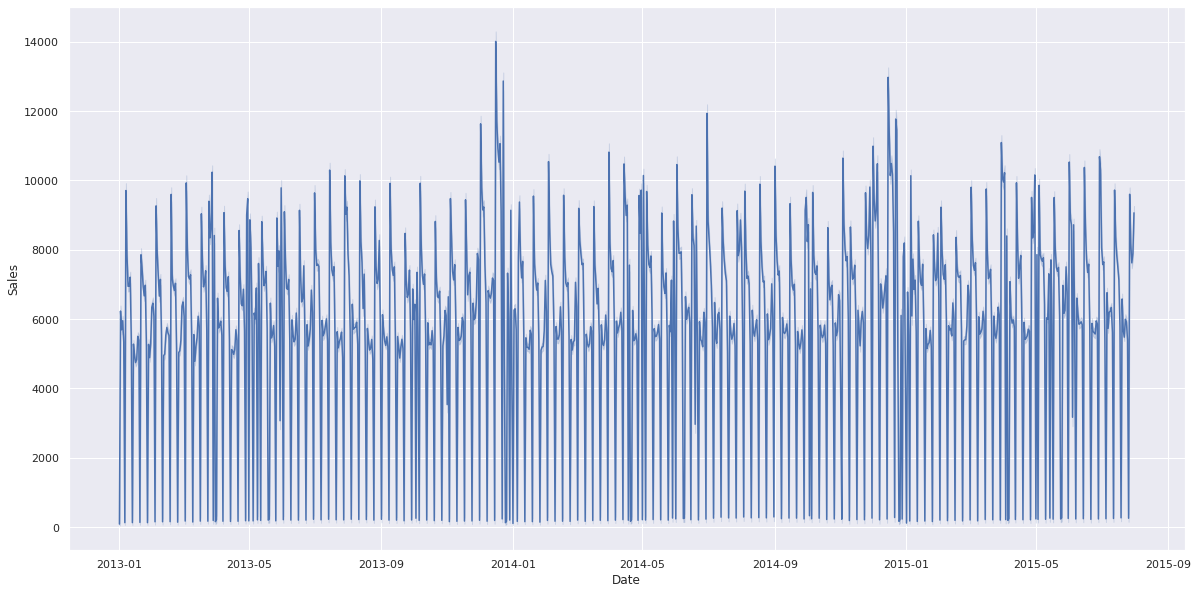

In [53]:
sns.lineplot(x = 'Date', y = 'Sales', data = demand, estimator = 'mean')

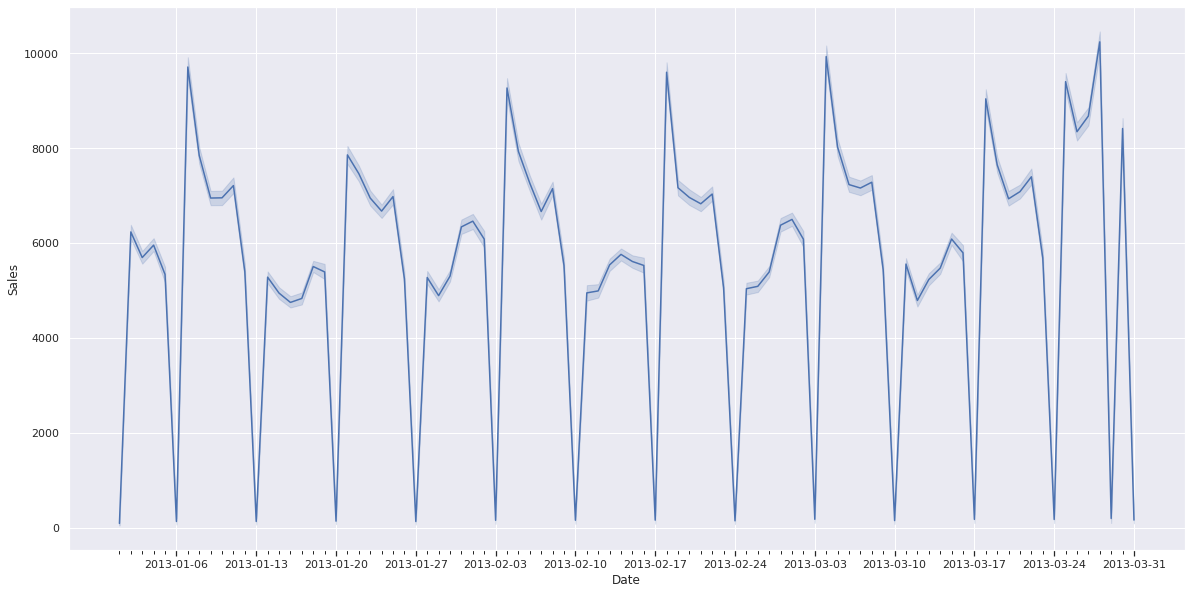

In [8]:
data = demand.loc['2013-01':'2013-03']
g = sns.lineplot(x = 'Date', y = 'Sales', data = data, estimator = 'mean')

g.tick_params(which="both", bottom=True)
_ = g.set_xticks(pd.date_range(start = data.index.min(), end = data.index.max(), freq = 'W'), minor = False)
_ = g.set_xticks(pd.date_range(start = data.index.min(), end = data.index.max(), freq = 'D'), minor = True)

### Saisonales Diagramm

<AxesSubplot:xlabel='Month', ylabel='Sales'>

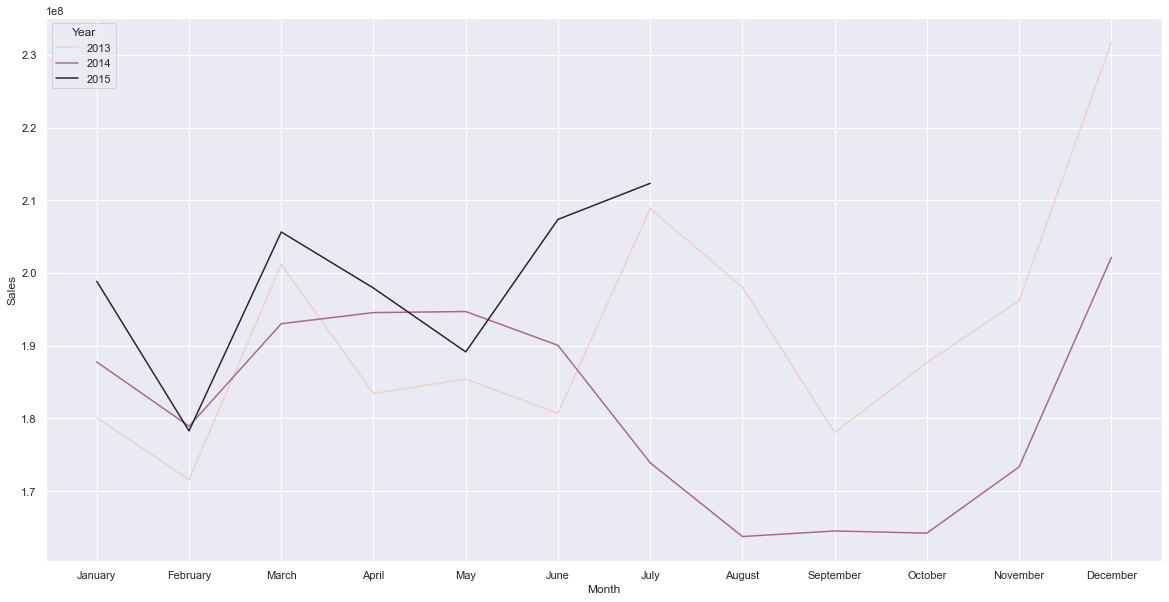

In [7]:
seasons = demand.groupby([pd.Grouper(freq='A'), pd.Grouper(freq='M')]).sum()
seasons.index.set_names(['Year', 'Month'], inplace = True)
seasons.reset_index(inplace = True)
seasons['Year'] = seasons['Year'].dt.year
seasons['Month'] = seasons['Month'].dt.month_name()

# display(seasons)

sns.lineplot(x = 'Month', y = 'Sales', hue = 'Year', data = seasons)

### Korrelationsdiagramm

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

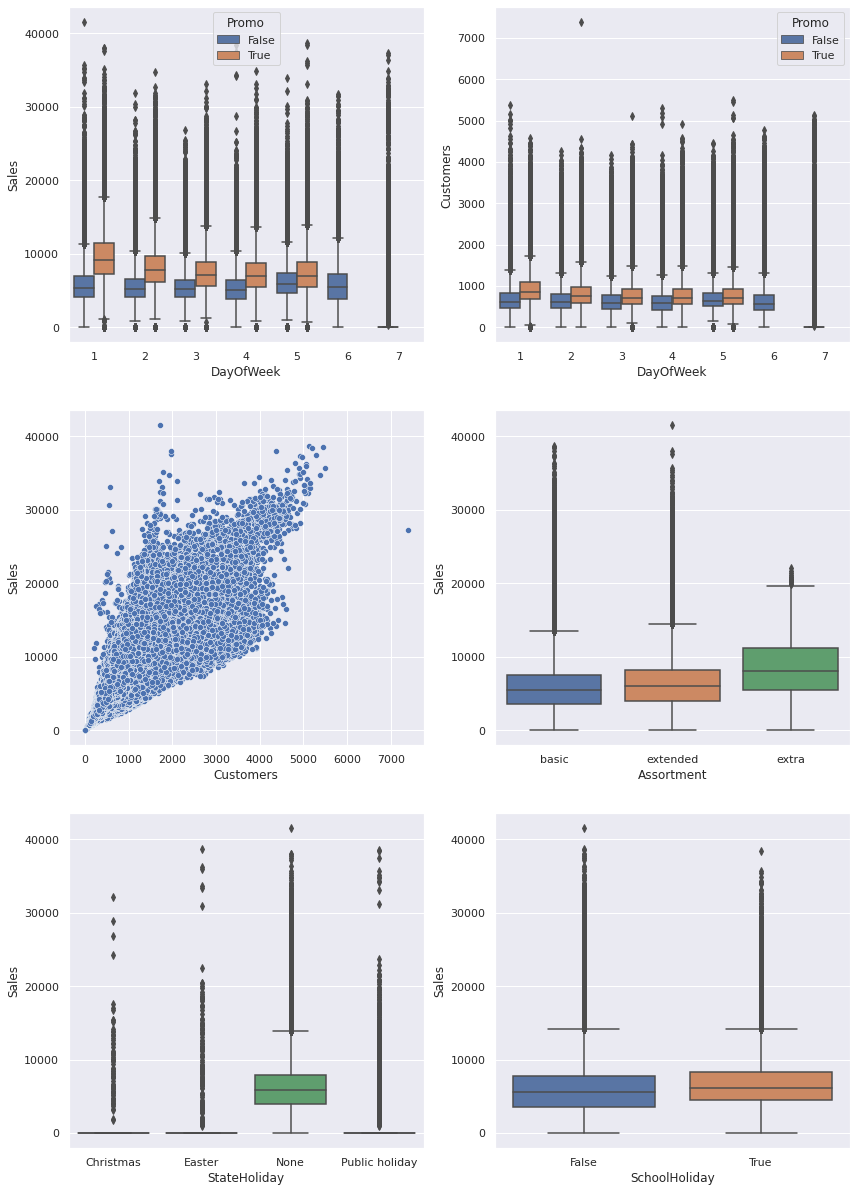

In [8]:
rows, cols = 3, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()


sns.boxplot(x = 'DayOfWeek', y = "Sales", hue = 'Promo', data = demand, ax = axs[0])
sns.boxplot(x = 'DayOfWeek', y = "Customers", hue = 'Promo', data = demand, ax = axs[1])
sns.scatterplot(x = 'Customers', y = "Sales", data = demand, ax = axs[2])
sns.boxplot(x = 'Assortment', y = "Sales", data = demand, ax = axs[3])
sns.boxplot(x = 'StateHoliday', y = "Sales", data = demand, ax = axs[4])
sns.boxplot(x = 'SchoolHoliday', y = "Sales", data = demand, ax = axs[5])

### Autokorrelationsdiagramm

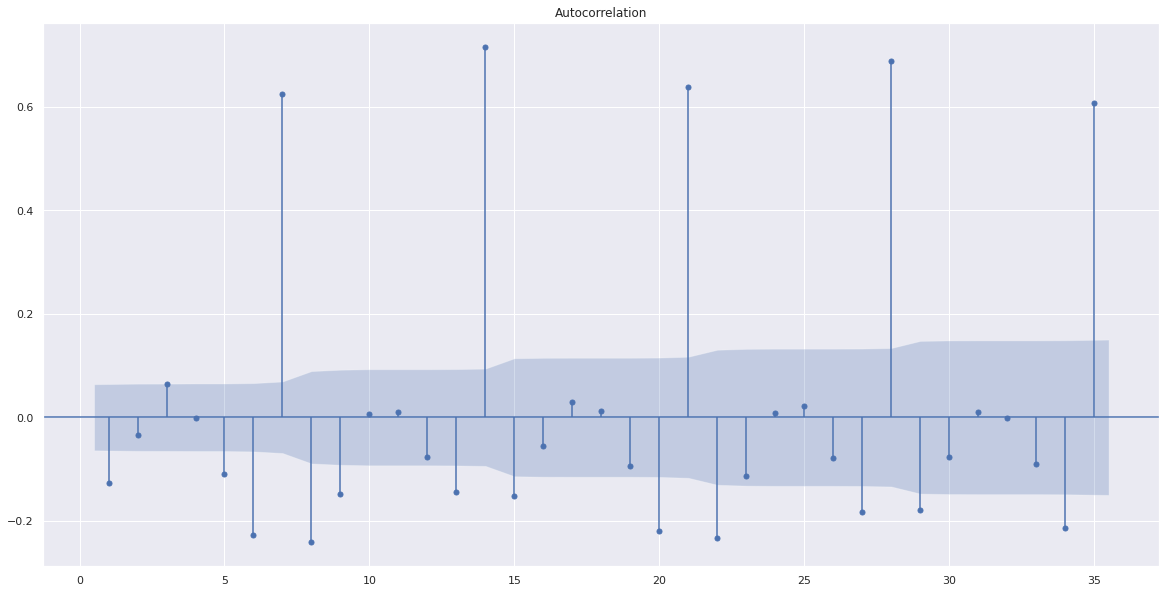

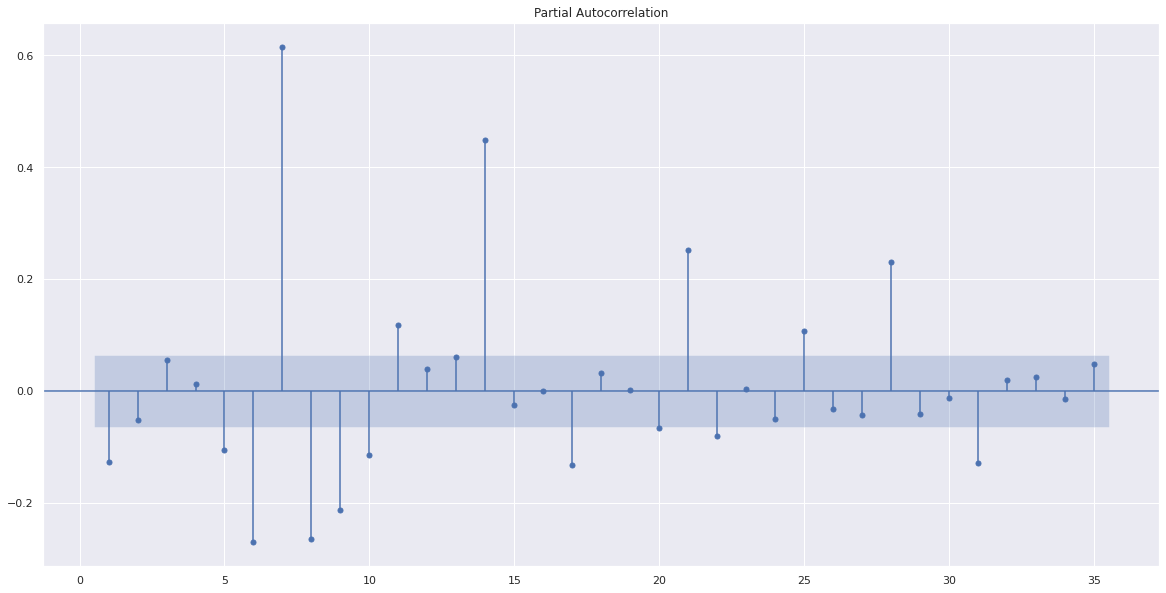

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

data = demand[demand.Store == 1]

plot_acf(data['Sales'], lags = 35, zero = False)
plt.show()
plot_pacf(data['Sales'], lags = 35, zero = False)
plt.show()

### Zerlegungsdiagramm

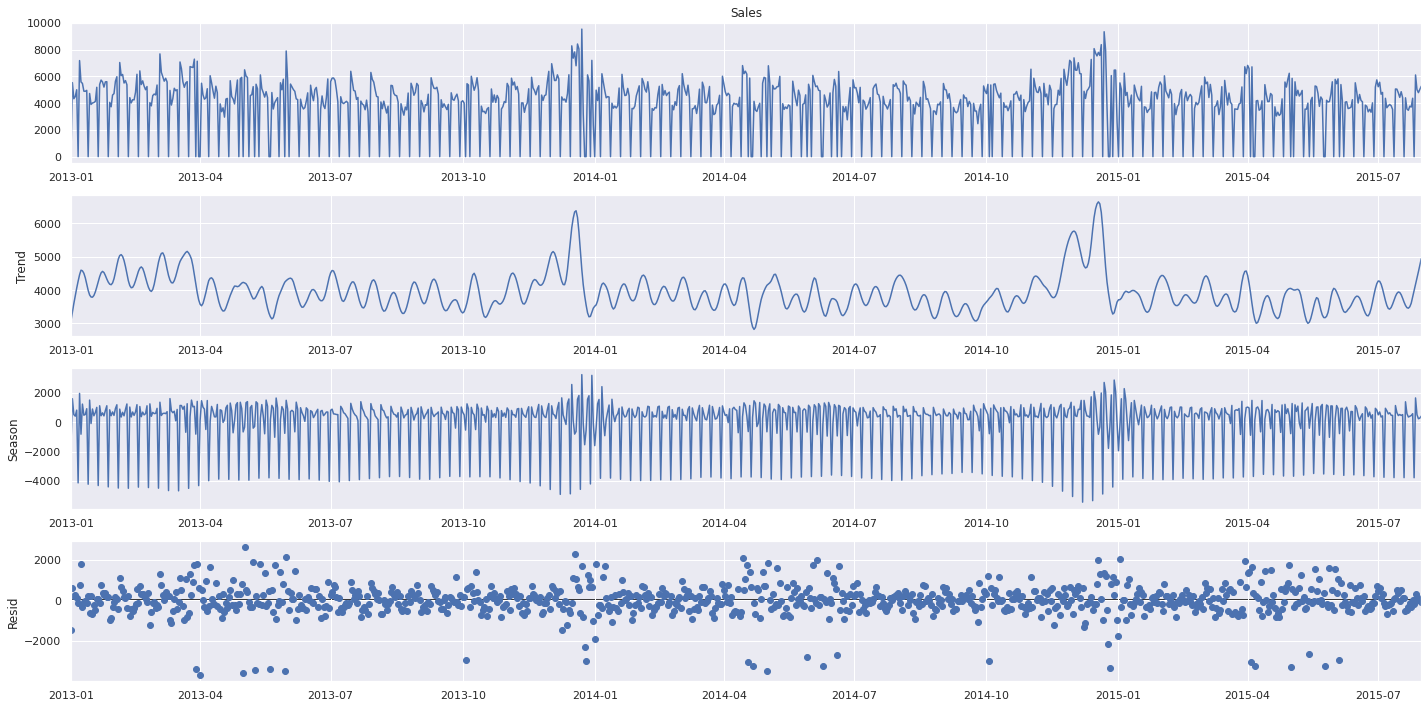

In [11]:
from statsmodels.tsa.seasonal import STL

data = demand[demand.Store == 1]

stl = STL(data['Sales'], period = 7)
decompose = stl.fit()
decompose.plot()
plt.show()

## Modellieren und Schätzen

### Autoregression
#### Einfache Verfahren

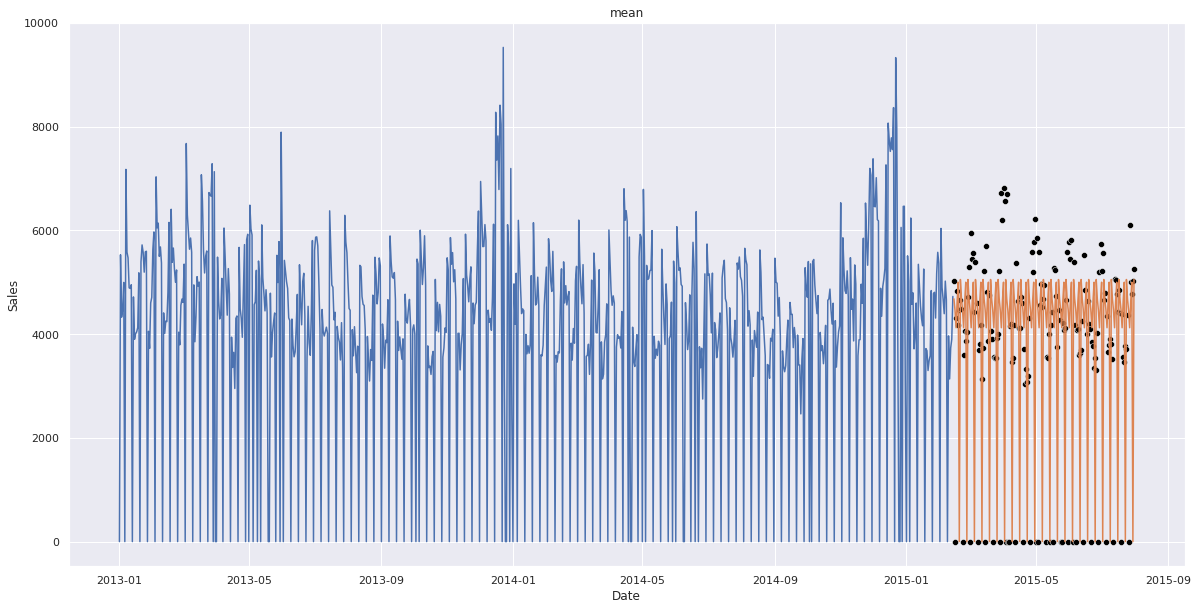

MAE: 	    1859.73
MAE: 	       1.54
RMSE: 	    2555.89
RMSSE: 	       1.48


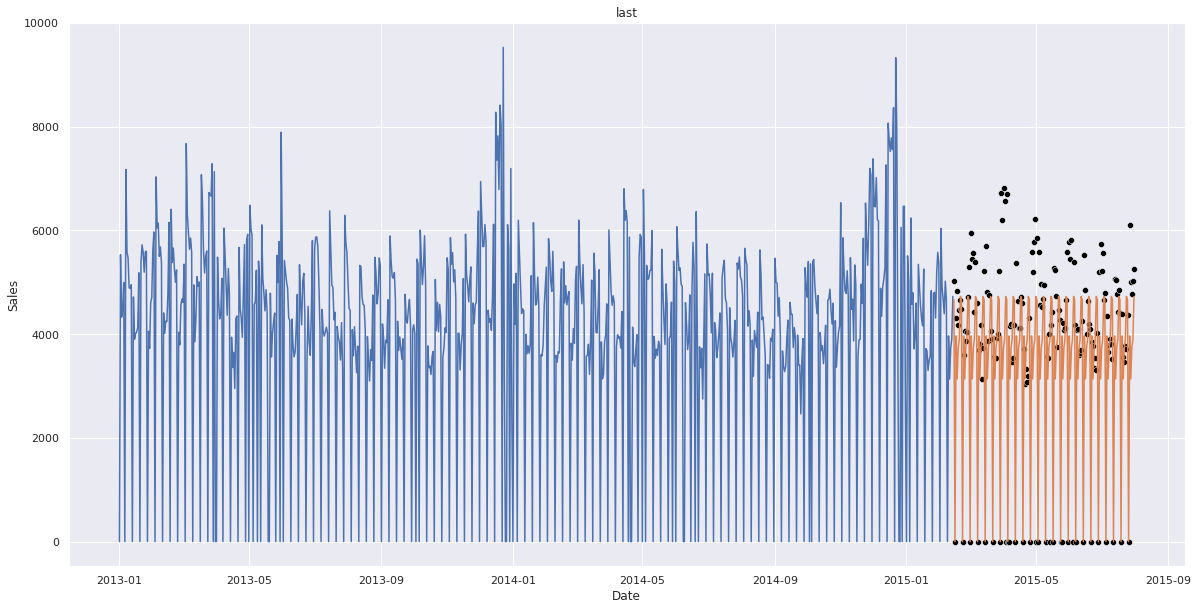

MAE: 	     846.82
MAE: 	       0.70
RMSE: 	    1290.38
RMSSE: 	       0.75


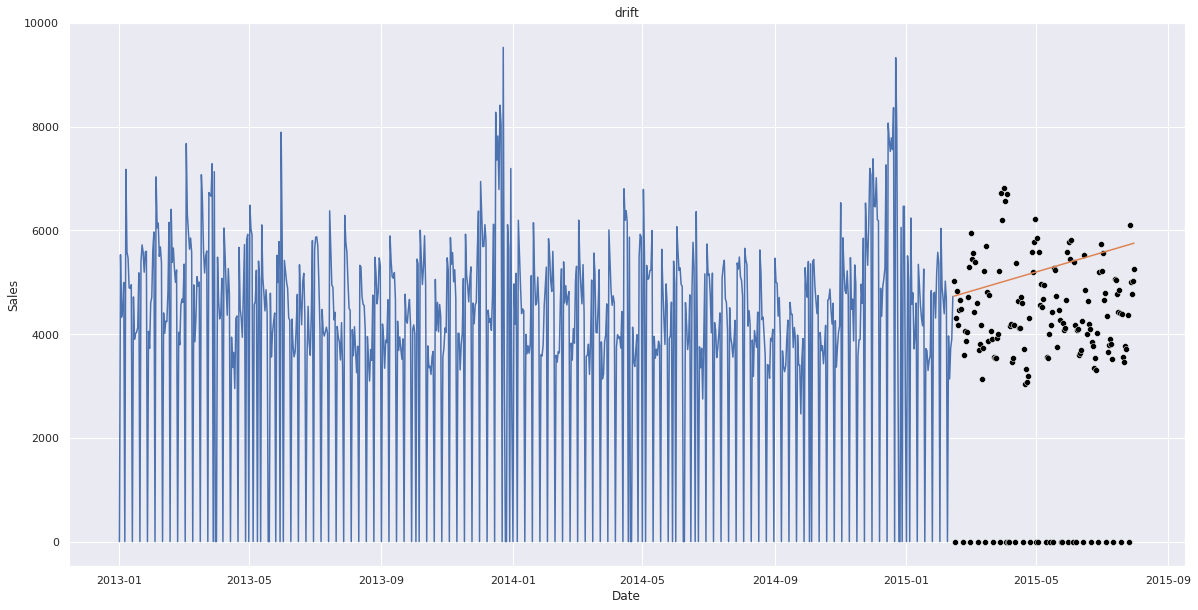

MAE: 	    1746.80
MAE: 	       1.45
RMSE: 	    2448.92
RMSSE: 	       1.42


In [25]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error as MASE
from sktime.performance_metrics.forecasting import mean_squared_error as MSE
from sktime.performance_metrics.forecasting import mean_squared_scaled_error as MSSE

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 6*28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

for strategy in ['mean', 'last', 'drift']:
    if strategy == 'drift':
        forecast = NaiveForecaster(strategy = strategy)
    else:
        forecast = NaiveForecaster(strategy = strategy, sp = 7)
    forecast.fit(train['Sales'])
    
    sns.lineplot(data = train['Sales']).set_title('Naive')
    sns.scatterplot(data = test['Sales'], color = 'black')
    sns.lineplot(data = forecast.predict(fh))
    plt.title(strategy)
    plt.show()
    
    print('MAE: \t %10.2f' % MAE(test['Sales'], forecast.predict(fh)))
    print('MAE: \t %10.2f' % MASE(test['Sales'], forecast.predict(fh), train['Sales'], sp = 7))
    print('RMSE: \t %10.2f' % MSE(test['Sales'], forecast.predict(fh), square_root = True))
    print('RMSSE: \t %10.2f' % MSSE(test['Sales'], forecast.predict(fh), train['Sales'], sp = 7, square_root = True))

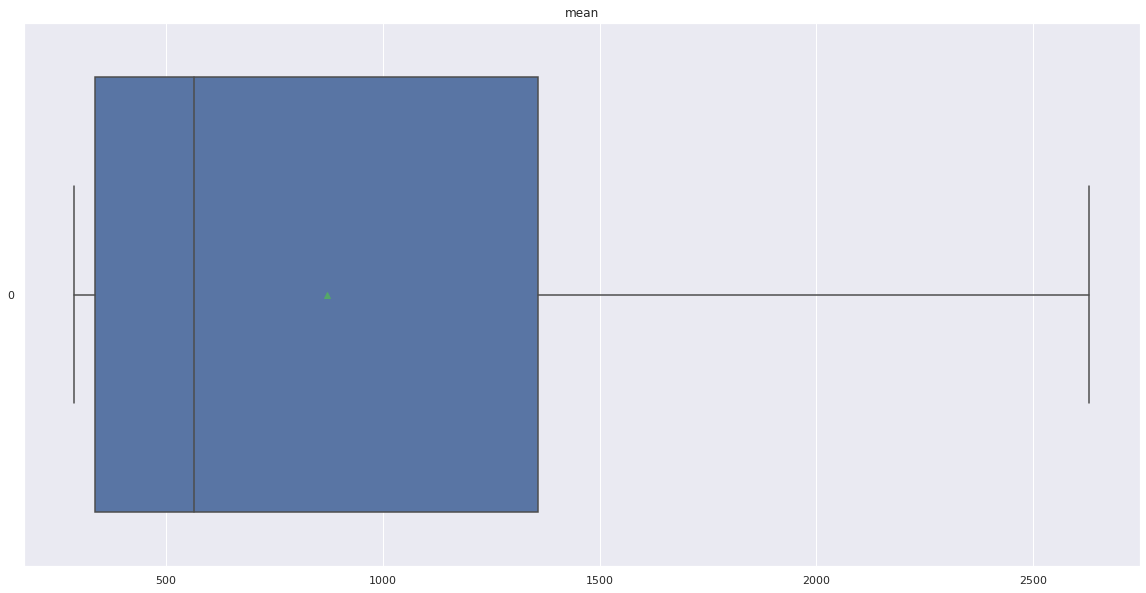

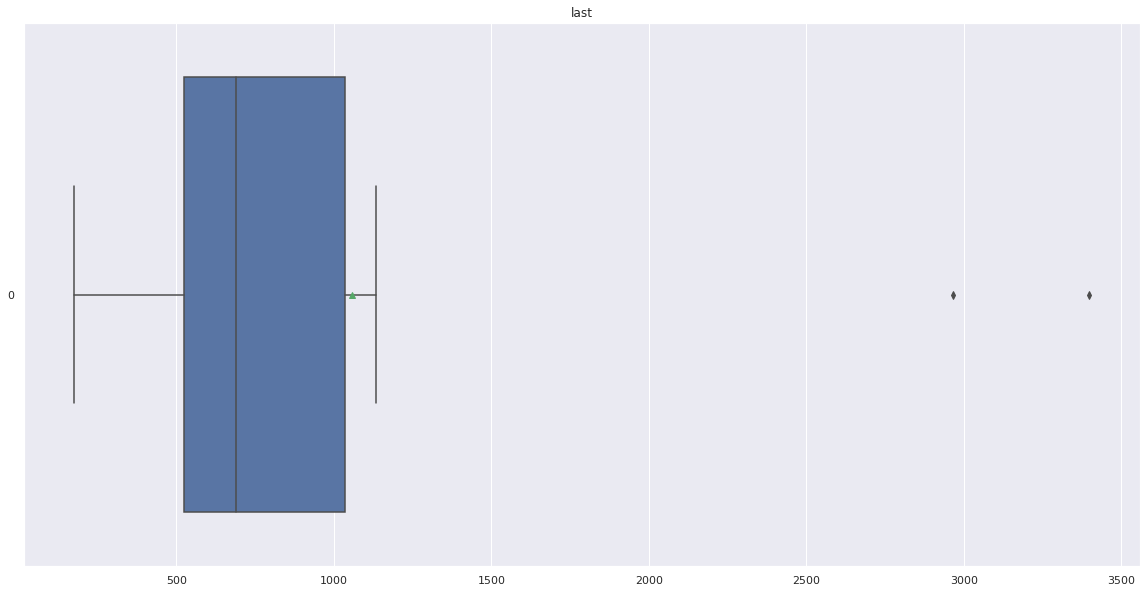

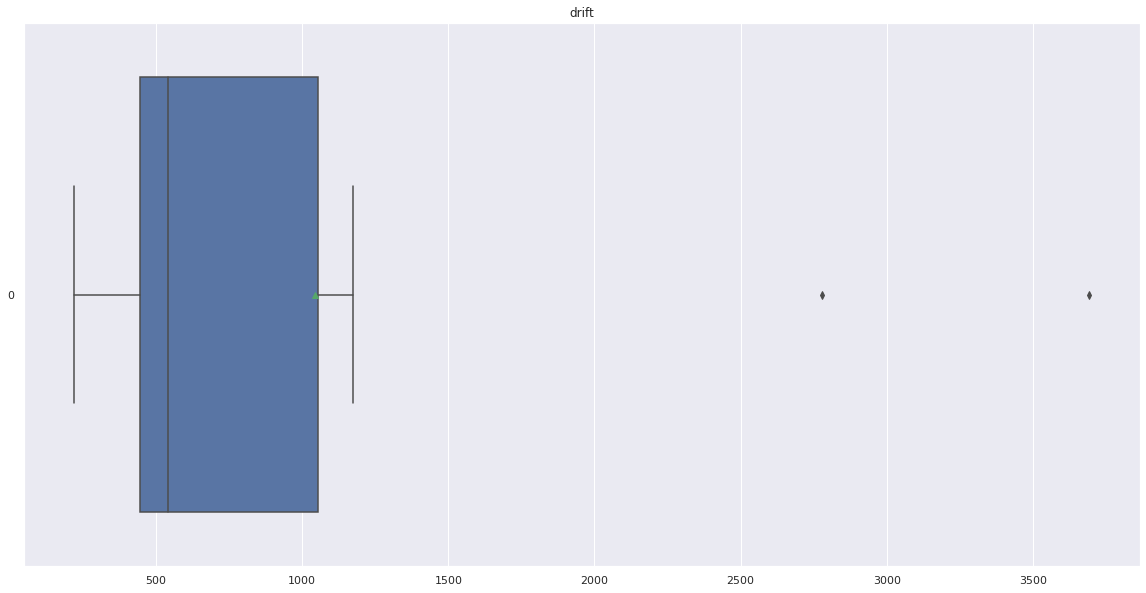

In [37]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.model_evaluation import evaluate
from sktime.performance_metrics.forecasting import MeanAbsoluteError

data = demand[demand.Store == 1]
data.index.freq = 'D'

cv = ExpandingWindowSplitter(
    fh = ForecastingHorizon(28), # 1
    initial_window = (len(data)-(12*28)), # 365
    step_length = 28, # 1
    start_with_window = True
)

MAE = MeanAbsoluteError()

for strategy in ['mean', 'last', 'drift']:
    if strategy == 'drift':
        forecast = NaiveForecaster(strategy = strategy)
    else:
        forecast = NaiveForecaster(strategy = strategy, sp = 7)
    
    df = evaluate(y = data['Sales'], forecaster = forecast, cv = cv, strategy = 'refit', scoring = MAE, return_data = True)
    # display(df)
        
    sns.boxplot(data = df['test_MeanAbsoluteError'], orient = 'h', showmeans = True).set_title(strategy)
    plt.show()

#### Exponentielle Glättung

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


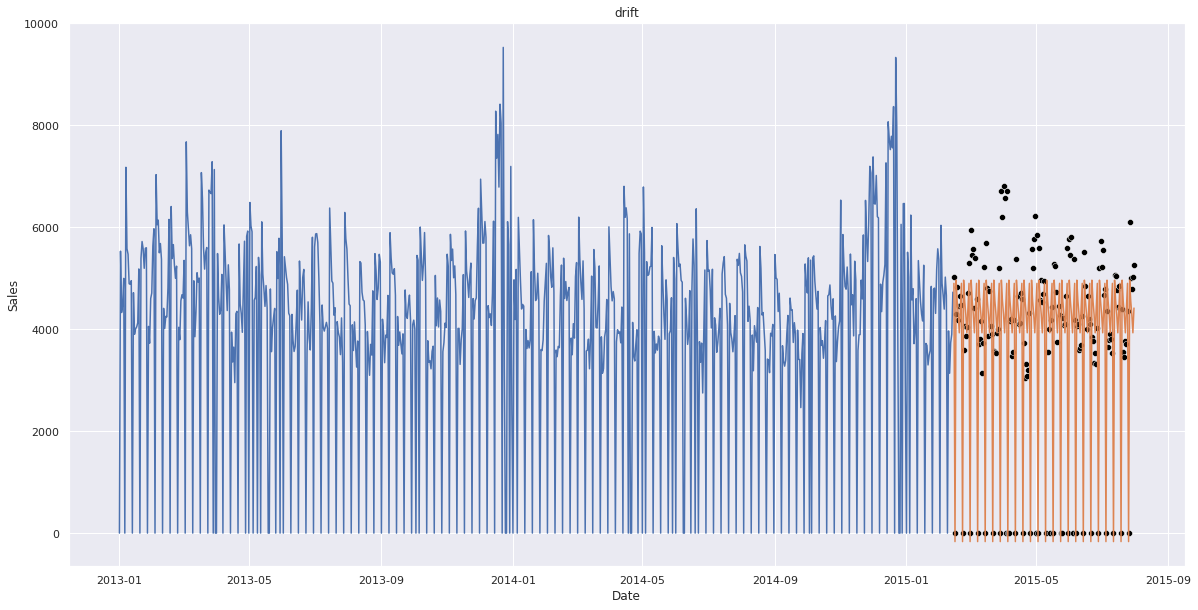

MAE: 	     738.75
MAE: 	       0.61
RMSE: 	    1134.06
RMSSE: 	       0.66


In [42]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error as MASE
from sktime.performance_metrics.forecasting import mean_squared_error as MSE
from sktime.performance_metrics.forecasting import mean_squared_scaled_error as MSSE

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 6*28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

forecast = ExponentialSmoothing(
        trend = None,
        seasonal = 'add',
        sp = 7
)

params = forecast.fit(train['Sales'])
   
sns.lineplot(data = train['Sales']).set_title('Naive')
sns.scatterplot(data = test['Sales'], color = 'black')
sns.lineplot(data = forecast.predict(fh))
plt.title(strategy)
plt.show()

print('MAE: \t %10.2f' % MAE(test['Sales'], forecast.predict(fh)))
print('MAE: \t %10.2f' % MASE(test['Sales'], forecast.predict(fh), train['Sales'], sp = 7))
print('RMSE: \t %10.2f' % MSE(test['Sales'], forecast.predict(fh), square_root = True))
print('RMSSE: \t %10.2f' % MSSE(test['Sales'], forecast.predict(fh), train['Sales'], sp = 7, square_root = True))

#### ARIMA

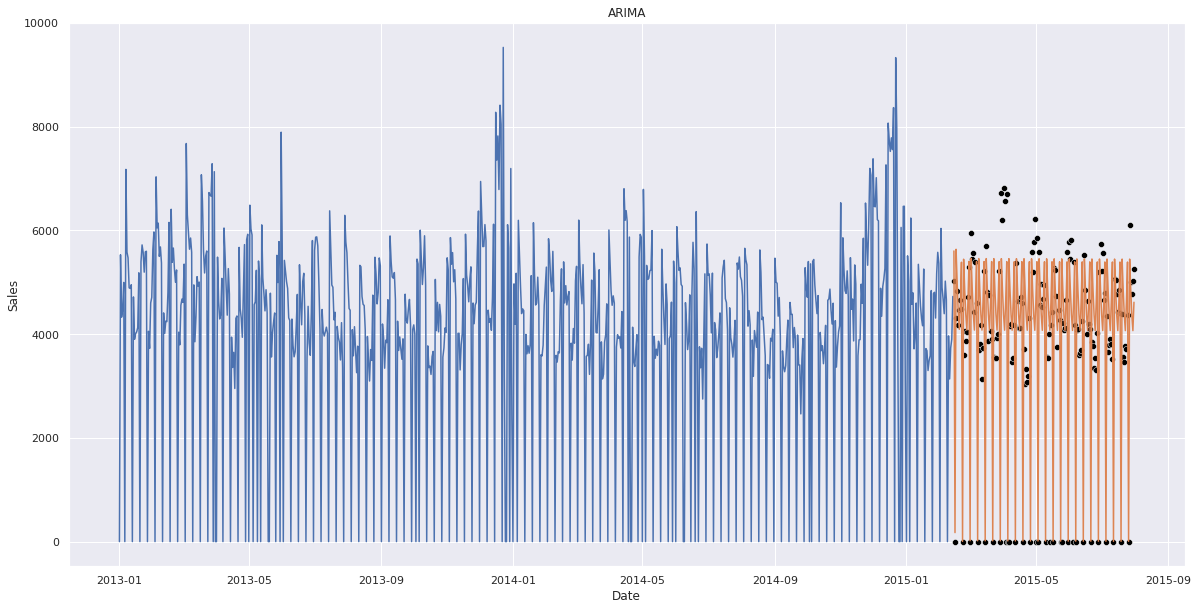

MAE: 	     779.98
MAE: 	       0.65
RMSE: 	    1227.71
RMSSE: 	       0.71


In [51]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error as MASE
from sktime.performance_metrics.forecasting import mean_squared_error as MSE
from sktime.performance_metrics.forecasting import mean_squared_scaled_error as MSSE

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 6*28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

arima = AutoARIMA(start_p = 0, d = 0, start_q = 0,
                  max_p = 7, max_d = 2, max_q = 7,
                  seasonal=True,
                  start_P = 0, D = 1, start_Q = 0,
                  max_P = 7, max_D = 2, max_Q = 7,
                  sp = 7,
                  trace=True,
                  error_action='warn',
                  stepwise=True #,
                  #random = True,
                  #n_fits = 20
                  ) 

# Stepwise: Best model:      ARIMA(4,0,0)(7,1,0)[7]
# Non-Stepwise: Best model:  ARIMA(0,0,3)(1,1,1)[7] 

arima = ARIMA(
    order=(0, 0, 3),
    seasonal_order=(1, 1, 1, 7),
    suppress_warnings = True
)

arima.fit(train['Sales'].astype('float'))


sns.lineplot(data = train['Sales'])
sns.scatterplot(data = test['Sales'], color = 'black')
sns.lineplot(data = arima.predict(fh))
plt.title('ARIMA')
plt.show()

print('MAE: \t %10.2f' % MAE(test['Sales'], arima.predict(fh)))
print('MAE: \t %10.2f' % MASE(test['Sales'], arima.predict(fh), train['Sales'], sp = 7))
print('RMSE: \t %10.2f' % MSE(test['Sales'], arima.predict(fh), square_root = True))
print('RMSSE: \t %10.2f' % MSSE(test['Sales'], arima.predict(fh), train['Sales'], sp = 7, square_root = True))

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


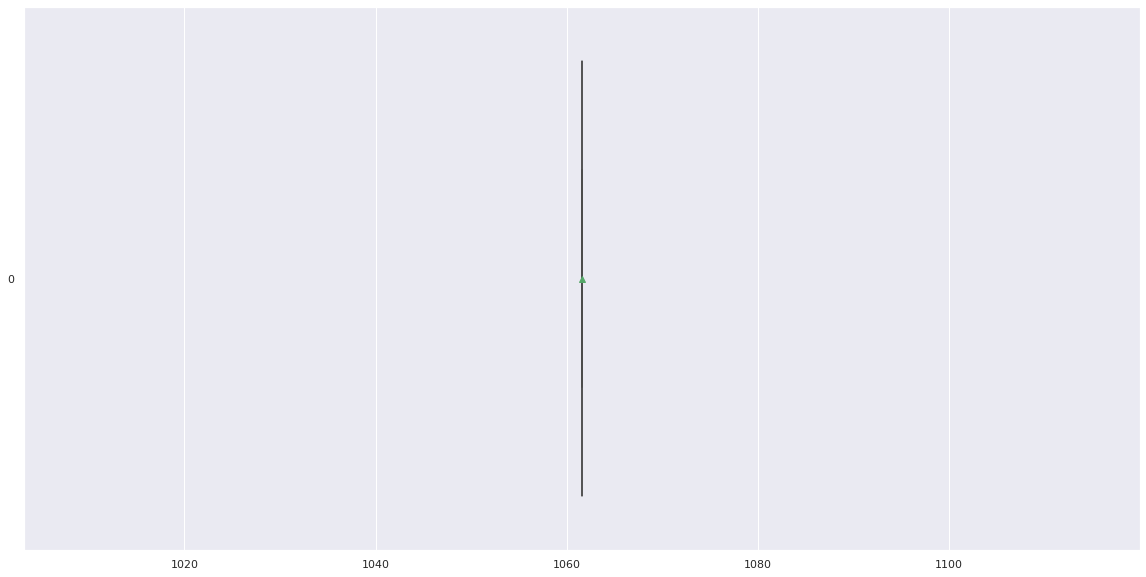

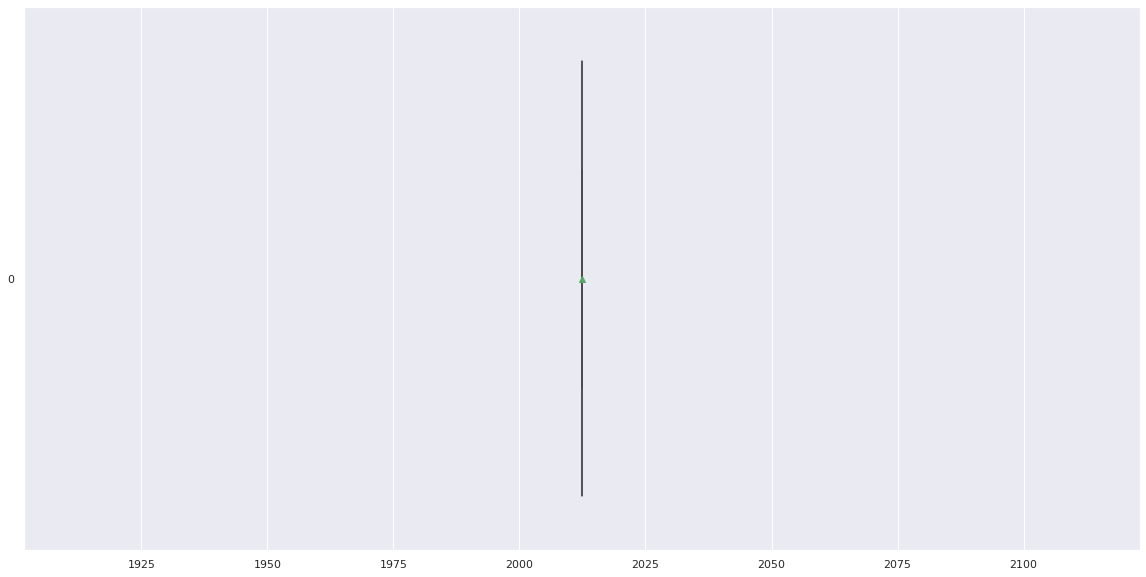

In [50]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.model_evaluation import evaluate
from sktime.performance_metrics.forecasting import MeanAbsoluteError

data = demand[demand.Store == 1]
data.index.freq = 'D'

cv = ExpandingWindowSplitter(
    fh = ForecastingHorizon(28), # 1
    initial_window = (len(data)-(6*28)), # 365
    step_length = 28, # 1
    start_with_window = True
)

ets = ExponentialSmoothing(
        trend = None,
        seasonal = 'add',
        sp = 7
)

arima = ARIMA(
    order=(0, 0, 3),
    seasonal_order=(1, 1, 1, 7),
    suppress_warnings = True
)

MAE = MeanAbsoluteError()

for forecast in [ets, arima]:
    
    df = evaluate(y = data['Sales'], forecaster = forecast, cv = cv, strategy = 'refit', scoring = MAE, return_data = True)
    # display(df)
        
    sns.boxplot(data = df['test_MeanAbsoluteError'], orient = 'h', showmeans = True)
    plt.show()

#### SARIMAX

 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=11771.451, Time=0.07 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=11572.967, Time=2.49 sec
 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=11570.829, Time=3.37 sec
 ARIMA(0,0,0)(0,1,3)[7] intercept   : AIC=11574.038, Time=4.99 sec
 ARIMA(0,0,0)(0,1,4)[7] intercept   : AIC=11573.766, Time=11.06 sec
 ARIMA(0,0,0)(0,1,5)[7] intercept   : AIC=11567.934, Time=20.99 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=11655.045, Time=1.27 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=11572.146, Time=1.82 sec
 ARIMA(0,0,0)(1,1,2)[7] intercept   : AIC=11574.100, Time=4.54 sec
 ARIMA(0,0,0)(1,1,3)[7] intercept   : AIC=inf, Time=7.98 sec
 ARIMA(0,0,0)(1,1,4)[7] intercept   : AIC=11567.862, Time=9.76 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=11609.088, Time=3.14 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=11574.036, Time=4.24 sec
 ARIMA(0,0,0)(2,1,2)[7] intercept   : AIC=11575.196, Time=4.70 sec
 ARIMA(0,0,0)(2,1,3)[7] intercept   : AIC=inf, Time=9.88 sec
 ARIM

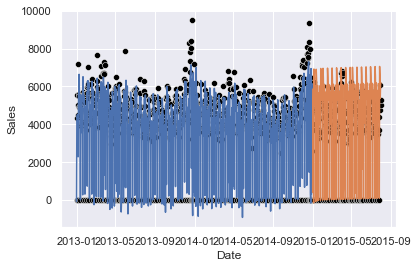

462.56279537765425

1071.0488723939545

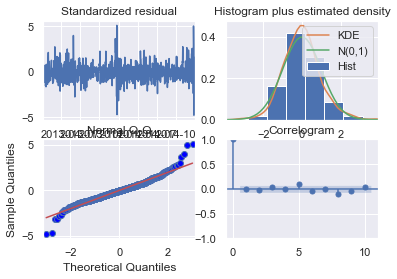

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set(rc={'figure.figsize':(20,10)})

# !pip install pmdarima
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error as mae

data = {}
data['all'] = demand[demand.Store == 1]
data['train'] = data['all'].loc['2013':'2014']
data['test'] = data['all'].loc['2015':]

X = {}
for key in ['train', 'test']:
    X[key] = data[key][['Open', 'Promo', 'StateHoliday']]
    X[key] = pd.get_dummies(X[key], columns = ['StateHoliday'], drop_first = False)
    for col in ['Open', 'Promo']:
        X[key][col] = X[key][col].replace(to_replace = [True, False], value = [1,0]).astype('int')
    # display(X[key].head())

arima = pm.auto_arima(data['train']['Sales'].astype('float'),
                      X = X['train'],
                      start_p = 0, d = 0, start_q = 0,
                      max_p = 7, max_d = 2, max_q = 7,
                      seasonal=True,
                      start_P = 0, D = 1, start_Q = 0,
                      max_P = 7, max_D = 2, max_Q = 7,
                      m = 7,
                      trace=True,
                      error_action='warn',
                      stepwise=False #,
                      #random = True,
                      #n_fits = 20
                     )  

forecast = pd.DataFrame(data = arima.predict(len(data['test']), X = X['test']), index = pd.date_range(start = data['test'].index.min(), end = data['test'].index.max()))
forecast.index.name = 'Date'
forecast.columns = ['Sales']

fitted = pd.DataFrame(data = arima.predict_in_sample(X = X['train']), index = pd.date_range(start = data['train'].index.min(), end = data['train'].index.max()))
fitted.index.name = 'Date'
fitted.columns = ['Sales']

sns.scatterplot(x = 'Date', y = 'Sales', data = data['train'], color = 'black')
sns.lineplot(x = 'Date', y = 'Sales', data = fitted)
sns.scatterplot(x = 'Date', y = 'Sales', data = data['test'], color = 'black')
sns.lineplot(x = 'Date', y = 'Sales', data = forecast)
plt.show()

arima.plot_diagnostics()

display(mae(train['Sales'], fitted['Sales']))
display(mae(test['Sales'], forecast['Sales']))

C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


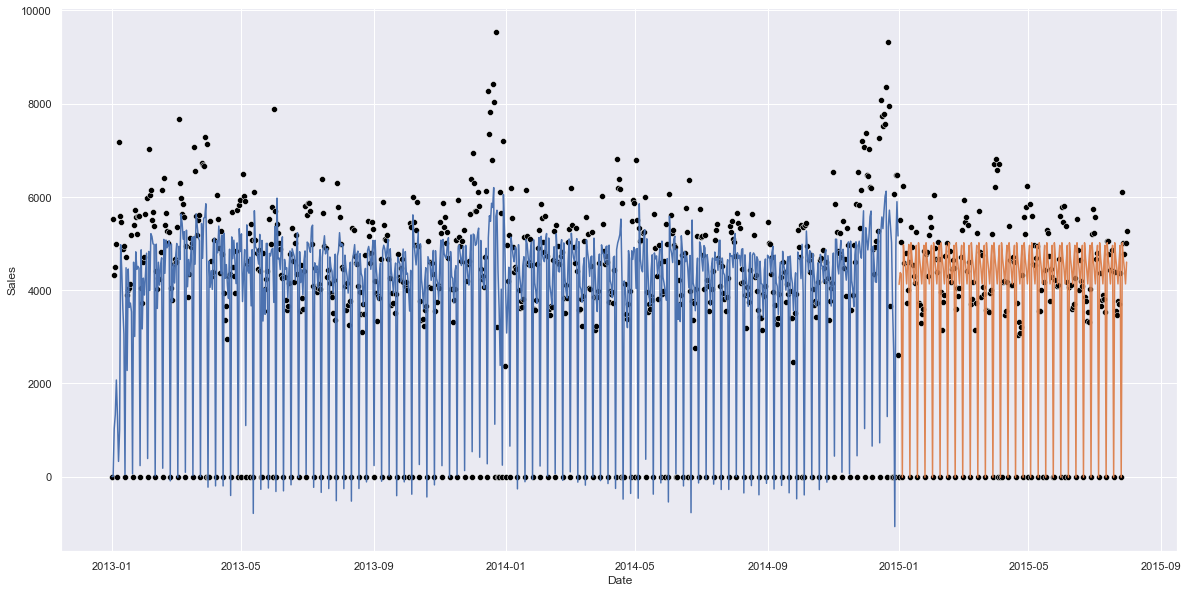

773.1036418325652

694.9686427628501

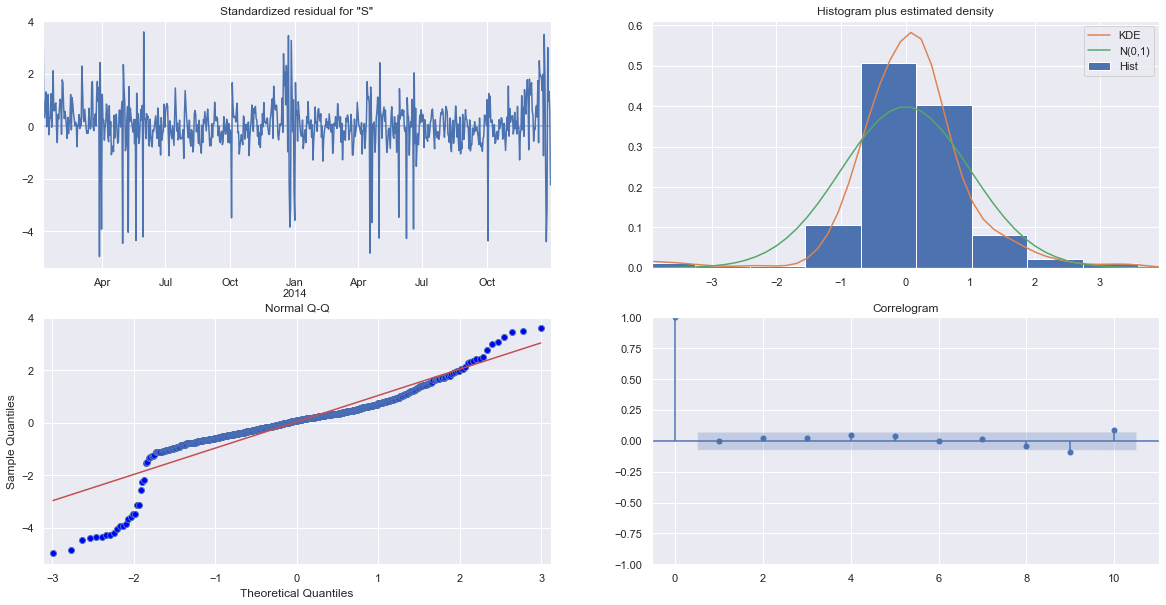

In [45]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error as mae
sns.set(rc={'figure.figsize':(20,10)})

data = demand[demand.Store == 1]
train = data.loc['2013':'2014']
test = data.loc['2015':]

arima = ARIMA(train['Sales'], order = (0,0,3), seasonal_order = (1,1,1,7)).fit()

forecast = pd.DataFrame(data = arima.predict(start = test.index.min(), end = test.index.max()), index = pd.date_range(start = test.index.min(), end = test.index.max()))
forecast.index.name = 'Date'
forecast.columns = ['Sales']

fitted = pd.DataFrame(data = arima.predict(start = train.index.min(), end = train.index.max()), index = pd.date_range(start = train.index.min(), end = train.index.max()))
fitted.index.name = 'Date'
fitted.columns = ['Sales']

sns.scatterplot(x = 'Date', y = 'Sales', data = train, color = 'black')
sns.lineplot(x = 'Date', y = 'Sales', data = fitted)
sns.scatterplot(x = 'Date', y = 'Sales', data = test, color = 'black')
sns.lineplot(x = 'Date', y = 'Sales', data = forecast)
plt.show()

arima.plot_diagnostics()

display(mae(train['Sales'], fitted['Sales']))
display(mae(test['Sales'], forecast['Sales']))

### Regression
#### Lineare Regression

,Sales,Open,Promo,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_Christmas,StateHoliday_Easter,StateHoliday_None,StateHoliday_Public holiday,Trend
Date,,,,,,,,,,,,,,,
2013-01-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1,734869
2013-01-02,5530,1,0,0,0,1,0,0,0,0,0,0,1,0,734870
2013-01-03,4327,1,0,0,0,0,1,0,0,0,0,0,1,0,734871
2013-01-04,4486,1,0,0,0,0,0,1,0,0,0,0,1,0,734872
2013-01-05,4997,1,0,0,0,0,0,0,1,0,0,0,1,0,734873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,6102,1,1,1,0,0,0,0,0,0,0,0,1,0,735806
2015-07-28,5011,1,1,0,1,0,0,0,0,0,0,0,1,0,735807
2015-07-29,4782,1,1,0,0,1,0,0,0,0,0,0,1,0,735808


,Open,Promo,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_Christmas,StateHoliday_Easter,StateHoliday_None,StateHoliday_Public holiday,Trend
Date,,,,,,,,,,,,,,
2013-01-01,0,0,0,1,0,0,0,0,0,0,0,0,1,734869
2013-01-02,1,0,0,0,1,0,0,0,0,0,0,1,0,734870
2013-01-03,1,0,0,0,0,1,0,0,0,0,0,1,0,734871
2013-01-04,1,0,0,0,0,0,1,0,0,0,0,1,0,734872
2013-01-05,1,0,0,0,0,0,0,1,0,0,0,1,0,734873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,1,1,1,0,0,0,0,0,0,0,0,1,0,735806
2015-07-28,1,1,0,1,0,0,0,0,0,0,0,1,0,735807
2015-07-29,1,1,0,0,1,0,0,0,0,0,0,1,0,735808


,Sales
Date,
2013-01-01,0
2013-01-02,5530
2013-01-03,4327
2013-01-04,4486
2013-01-05,4997
...,...
2015-07-27,6102
2015-07-28,5011
2015-07-29,4782


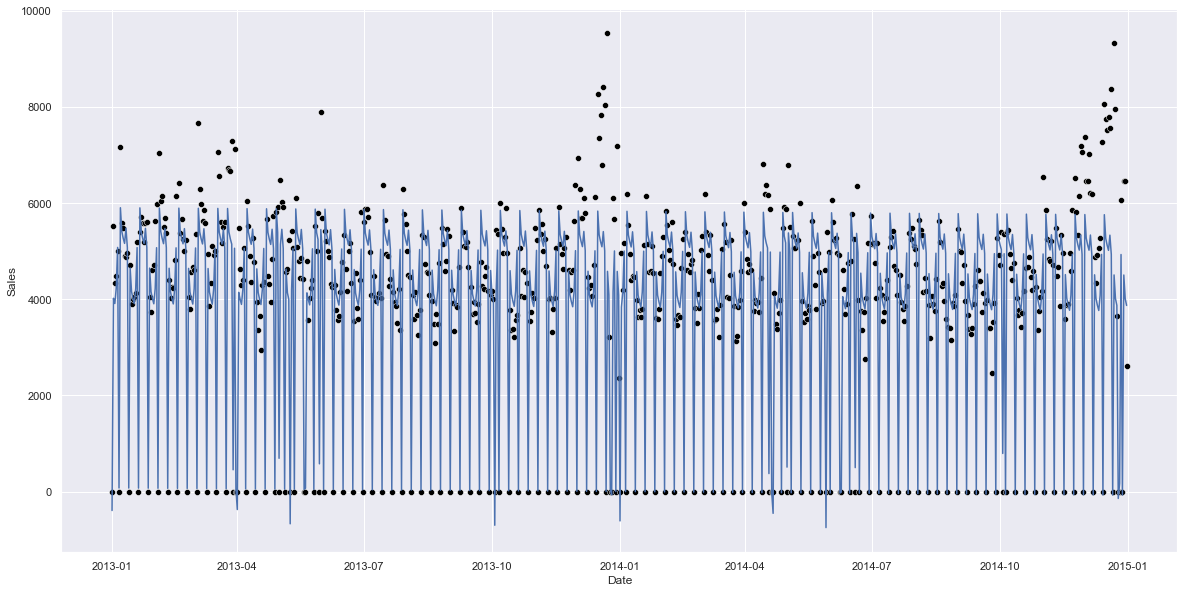

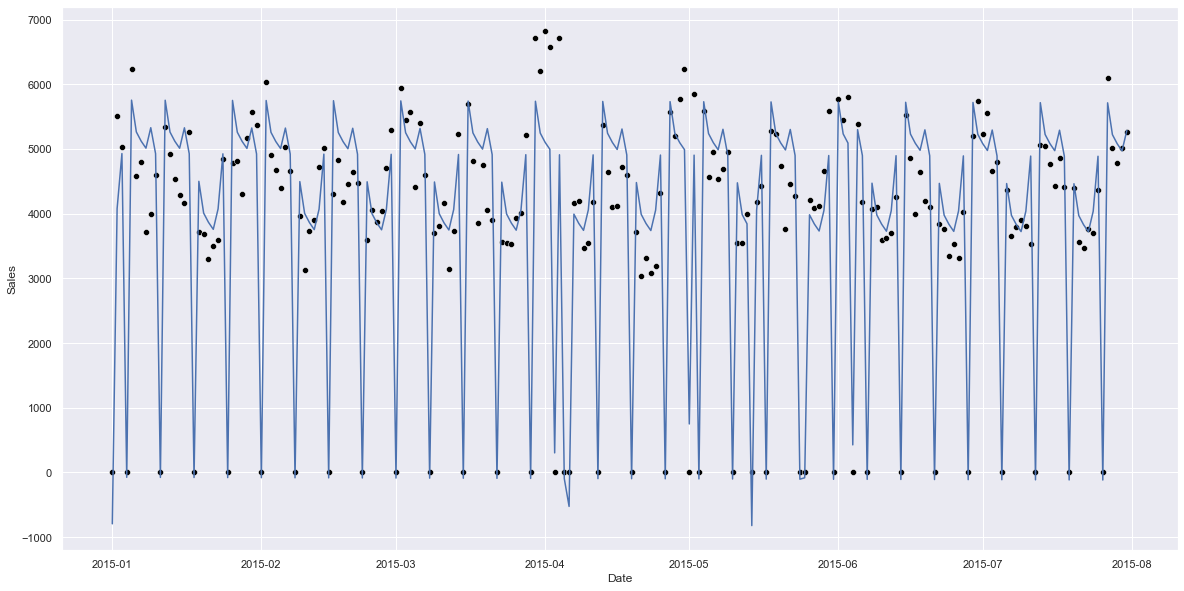

446.5715047631591

In [75]:
from sklearn.linear_model import LinearRegression
import datetime as dt

data = demand[demand.Store == 1]

data_reg = data[['Sales', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday']].copy()
data_reg = pd.get_dummies(data_reg, columns = ['DayOfWeek', 'StateHoliday'], drop_first = False)
for col in ['Open', 'Promo']:
    data_reg[col] = data_reg[col].replace(to_replace = [True, False], value = [1,0]).astype('int')
data_reg['Trend'] = data.index.map(dt.datetime.toordinal)
    
display(data_reg)

x = data_reg.drop(columns = ['Sales'])
y = data_reg[['Sales']]

display(x)
display(y)

x_train = x.loc['2013':'2014']
x_test = x.loc['2015':]
y_train = y.loc['2013':'2014']
y_test = y.loc['2015':]

reg = LinearRegression().fit(x_train, y_train)

forecast = pd.DataFrame(data = reg.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
forecast.index.name = 'Date'
forecast.columns = ['Sales']

fitted = pd.DataFrame(data = reg.predict(x_train), index = pd.date_range(start = x_train.index.min(), end = x_train.index.max()))
fitted.index.name = 'Date'
fitted.columns = ['Sales']

sns.scatterplot(x = 'Date', y = 'Sales', data = y_train, color = 'black')
sns.lineplot(x = 'Date', y = 'Sales', data = fitted)
plt.show()
sns.scatterplot(x = 'Date', y = 'Sales', data = y_test, color = 'black')
sns.lineplot(x = 'Date', y = 'Sales', data = forecast)
plt.show()

display(mae(y_test['Sales'], forecast['Sales']))

### Prophet

,ds,holiday,lower_window,upper_window
0,2013-01-01,Public holiday,0,1
1,2013-03-29,Easter,0,1
2,2013-04-01,Easter,0,1
3,2013-05-01,Public holiday,0,1
4,2013-05-09,Public holiday,0,1
5,2013-05-20,Public holiday,0,1
6,2013-05-30,Public holiday,0,1
7,2013-10-03,Public holiday,0,1
8,2013-12-25,Christmas,0,1
9,2013-12-26,Christmas,0,1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,Promo
0,2015-01-01,False
1,2015-01-02,False
2,2015-01-03,False
3,2015-01-04,False
4,2015-01-05,True
...,...,...
207,2015-07-27,True
208,2015-07-28,True
209,2015-07-29,True
210,2015-07-30,True


485.4234691200963

621.4000628364736

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Easter,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,3637.604507,-728.937768,779.579218,3637.604507,3637.604507,0.0,0.0,0.0,0.0,...,192.501619,192.501619,192.501619,692.961423,692.961423,692.961423,0.0,0.0,0.0,12.572077
1,2015-01-02,3638.242185,5181.687153,6660.671593,3638.242185,3638.242185,0.0,0.0,0.0,0.0,...,445.307606,445.307606,445.307606,572.771917,572.771917,572.771917,0.0,0.0,0.0,5923.204919
2,2015-01-03,3638.879864,4718.363256,6240.646012,3638.879864,3638.879864,0.0,0.0,0.0,0.0,...,1355.992768,1355.992768,1355.992768,454.925872,454.925872,454.925872,0.0,0.0,0.0,5449.798505
3,2015-01-04,3639.517543,-394.052103,1108.921293,3639.517543,3639.517543,0.0,0.0,0.0,0.0,...,-3610.766049,-3610.766049,-3610.766049,341.046399,341.046399,341.046399,0.0,0.0,0.0,369.797893
4,2015-01-05,3640.155222,5348.227884,6824.751016,3640.155222,3640.155222,0.0,0.0,0.0,0.0,...,932.877593,932.877593,932.877593,232.658642,232.658642,232.658642,0.0,0.0,0.0,6117.084604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2015-07-27,3769.604048,5106.589879,6627.204995,3732.429291,3807.239970,0.0,0.0,0.0,0.0,...,932.877593,932.877593,932.877593,-149.248858,-149.248858,-149.248858,0.0,0.0,0.0,5864.625929
208,2015-07-28,3770.241727,4547.759462,6030.036240,3732.773158,3808.299569,0.0,0.0,0.0,0.0,...,388.641999,388.641999,388.641999,-165.938907,-165.938907,-165.938907,0.0,0.0,0.0,5304.337965
209,2015-07-29,3770.879406,4483.806647,5990.600908,3733.104784,3809.359167,0.0,0.0,0.0,0.0,...,295.444464,295.444464,295.444464,-184.823157,-184.823157,-184.823157,0.0,0.0,0.0,5192.893859
210,2015-07-30,3771.517085,4402.449113,5782.010092,3733.418082,3810.433367,0.0,0.0,0.0,0.0,...,192.501619,192.501619,192.501619,-205.604580,-205.604580,-205.604580,0.0,0.0,0.0,5069.807269


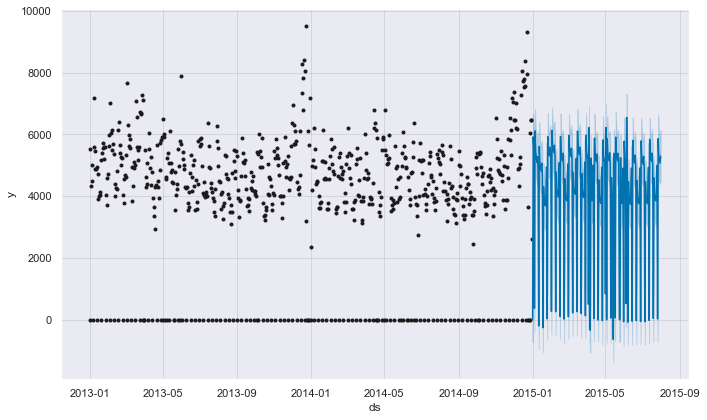

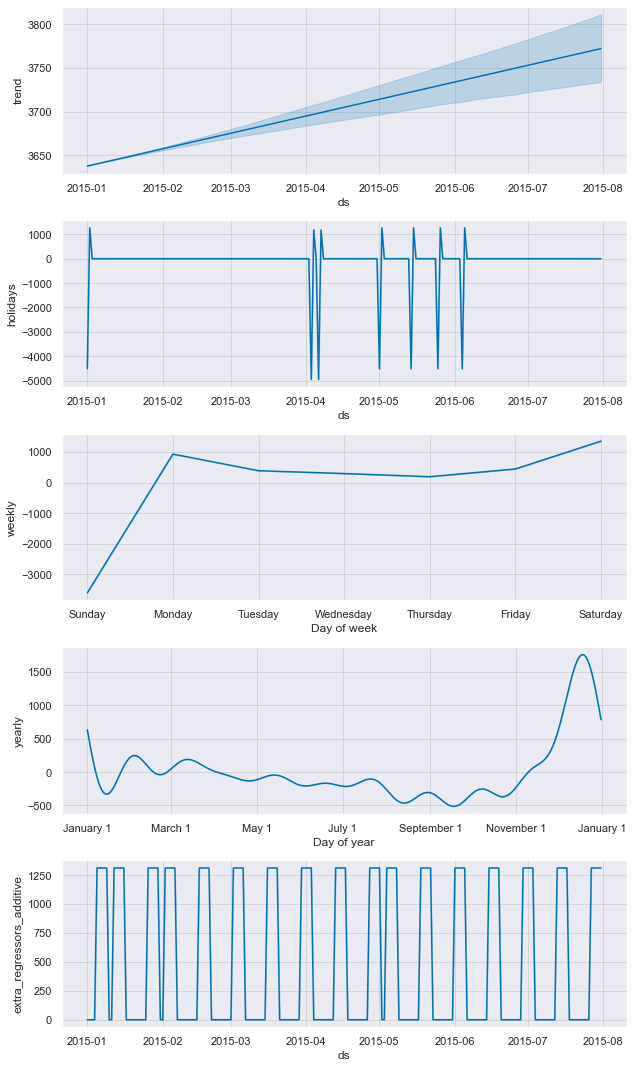

In [32]:
#!pip install prophet
from prophet import Prophet

data_prophet = pd.DataFrame(train['Sales'])
data_prophet.reset_index(inplace = True)
data_prophet.columns = ['ds', 'y']

holidays = pd.DataFrame(data[data.StateHoliday != 'None']['StateHoliday'])
holidays.reset_index(inplace = True)
holidays.columns = ['ds', 'holiday']
holidays['lower_window'] = 0
holidays['upper_window'] = 1

display(holidays)

data_prophet['Promo'] = train['Promo'].to_numpy()

p = Prophet(yearly_seasonality = True, holidays = holidays)
p.add_regressor('Promo')
p.fit(data_prophet)

forecast = p.make_future_dataframe(periods = len(test), freq='D', include_history = False)
forecast['Promo'] = test['Promo'].to_numpy()
display(forecast)
forecast = p.predict(forecast)

display(mae(test['Sales'], forecast['yhat']))
display(rmse(test['Sales'], forecast['yhat'], squared = False))

display(forecast)

fig = p.plot(forecast)
fig = p.plot_components(forecast)